# One-Sample z-Test

The one-sample z-test is best suited for situations where you want to investigate whether a given "sample" comes from a particular population.

### The Analytical Question

- A data scientist wants to examine if there is an effect on IQ scores when using tutors.
- They conduct IQ test on 40 students and want to compare their IQ to the general population..
- A standardized IQ test has a mean of 100 and a standard deviation of 16.
- When the group is testedd,  there is an IQ average of 103.
- Based on this finding, does tutoring make a difference?



#### Step 1: State Your Hypothesis


##### The Alternative Hypothesis ($H_a$)
The alternative hypothesis always reflects the idea or theory that needs to be tested.\
Here, we are testing if tutoring has resulted in significant increase in student IQ.\
So;\

> The sample mean is significantly bigger that the population mean.
$$\large H_a\text{:   }\mu < \bar{x}$$
Where sample mean is $\bar{x}$ and populations is ($\mu$)


##### The Null Hypothesis ($H_0$)
The null hypothesis can be defined as there being no significant difference between the specified sample and population means.
> There is **no significant difference** between the sample mean and population mean 
$$\large H_0\text{:   }\mu \geq \bar{x}$$


#### Step 2: Specify a Significance Level (alpha)


The significance level alpha ($\alpha$) has to be decided, as a cut-off value to define whether you can reject your null hypothesis or not.\

This is often set to 0.05, which is also a side effect that there is a 5% chance that you will reject the null null hyptheses when it is true.\

Later, you'll see that using $\alpha$, you'll formulate your test result as: "with a confidence level of 95%, we can state that...". For a $z$-distribution, this can be shown as below:
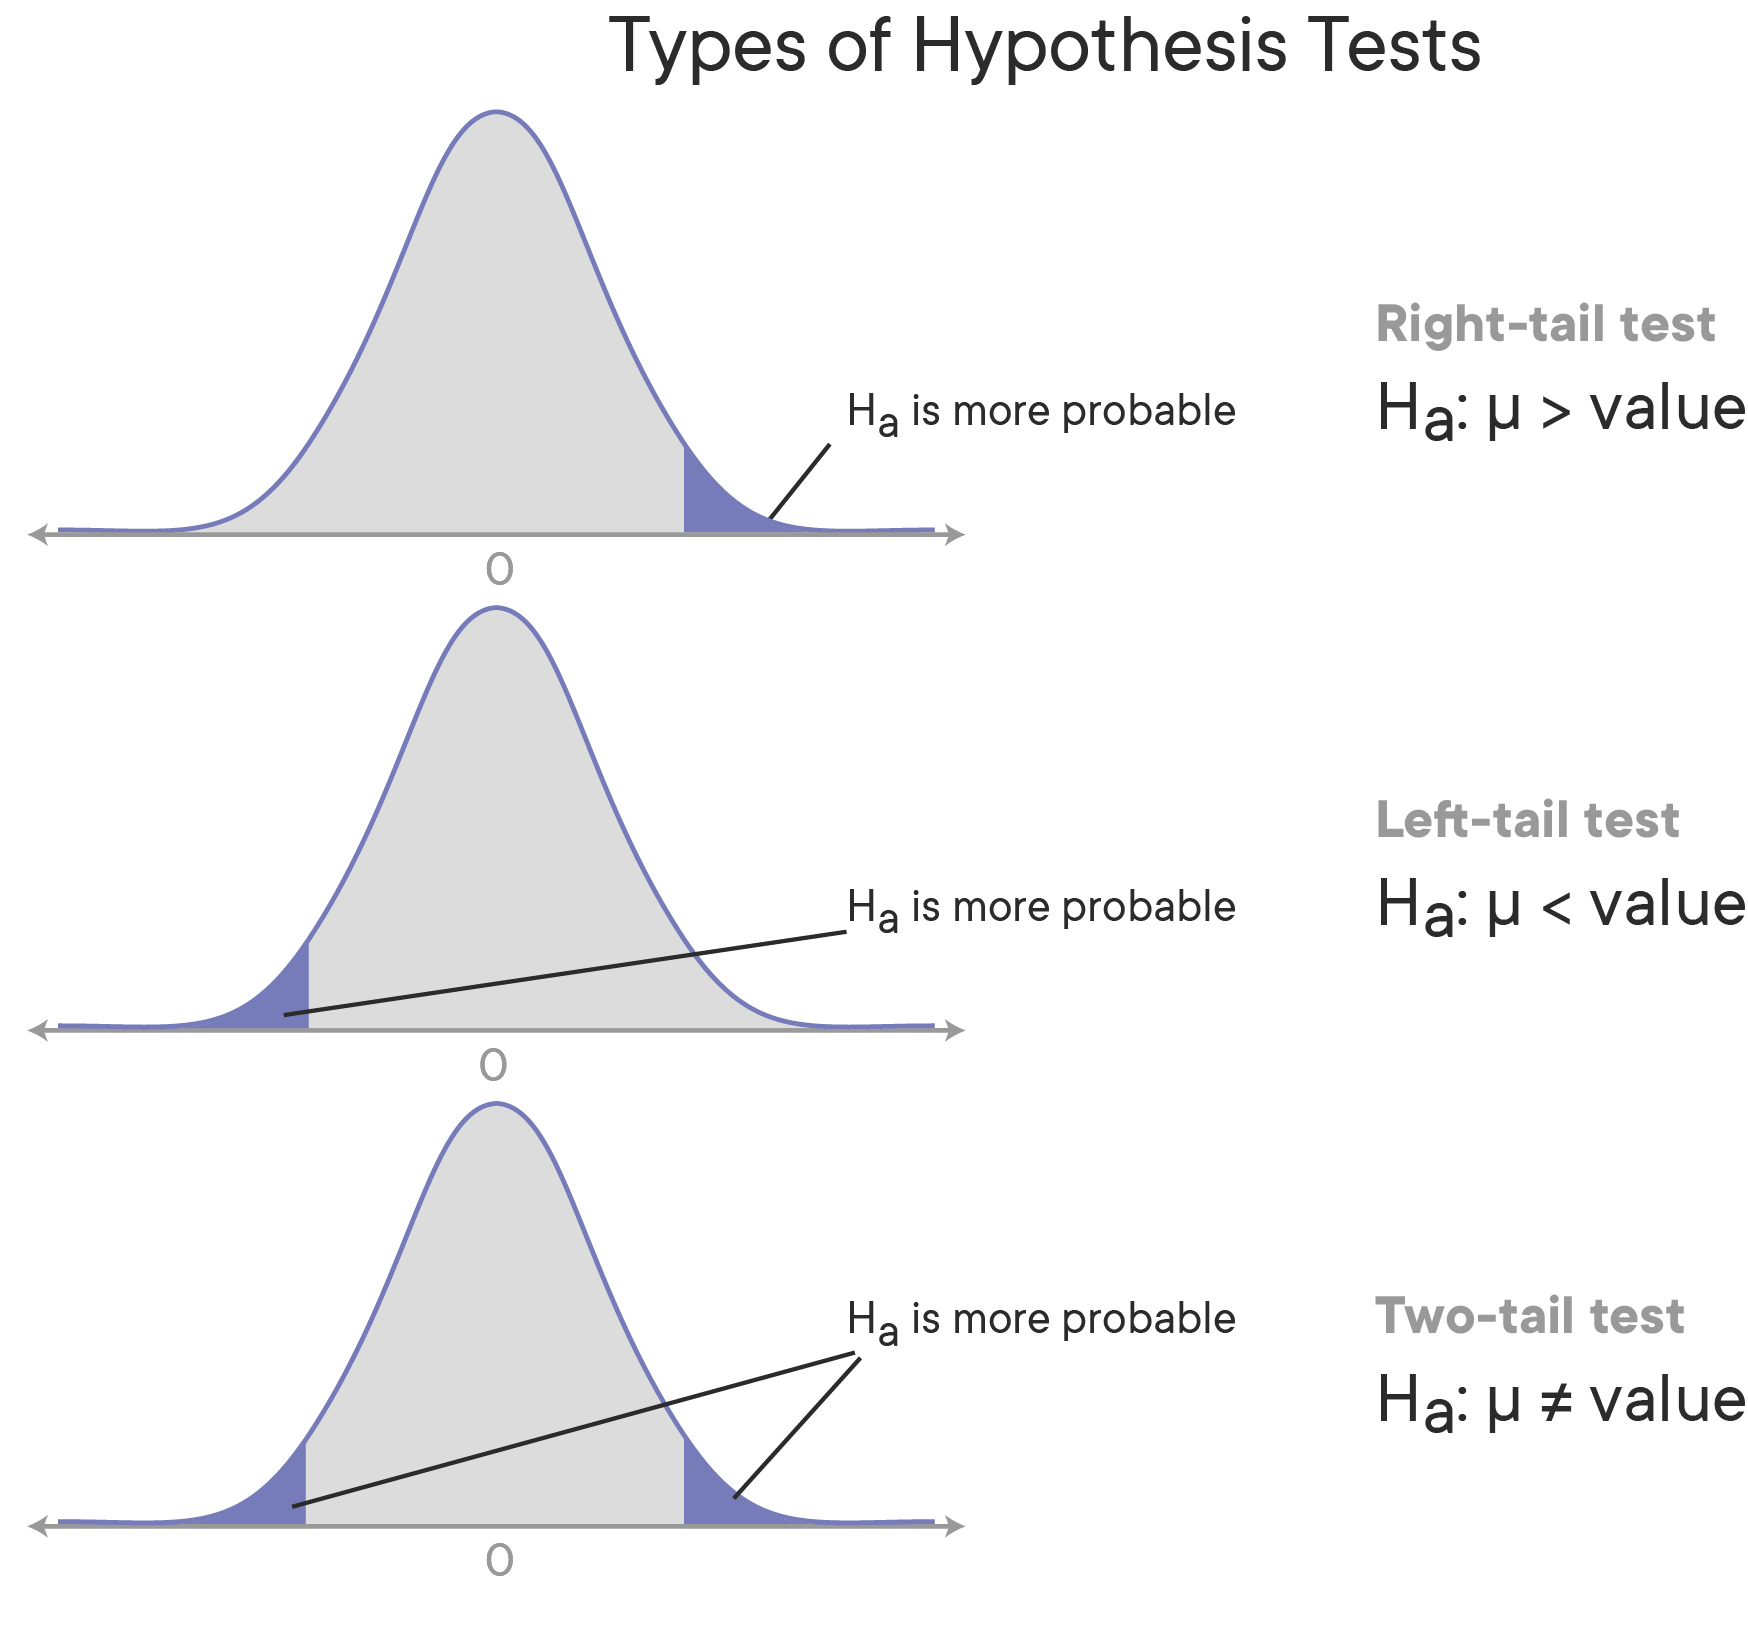

Each purple region would be calculated as $\dfrac{\alpha}{2}$. When testing a single side (as in the example) i.e. just higher OR just lower, you can use a one-tail test as shown in the first and second images. The $\alpha$ value we use is 0.05 or $5\%$.

#### Step 3: Calculate the test statistic

For z-test, a z-statistic is used as our test statistic. A one sample z-statistic is calculated as;


$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square root of $n$ to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". 

In python;


In [4]:
import scipy.stats as stats
from math import sqrt
x_bar = 103 # sample mean 
n = 40 # number of students
sigma = 16 # sd of population
mu = 100 # Population mean 
print('(Sample mean - population mean) / (standard deviation/square root of n)')
z = (x_bar - mu)/(sigma/sqrt(n))
print('The z-statistic is:', z)

(Sample mean - population mean) / (standard deviation/square root of n)
The z-statistic is: 1.1858541225631423


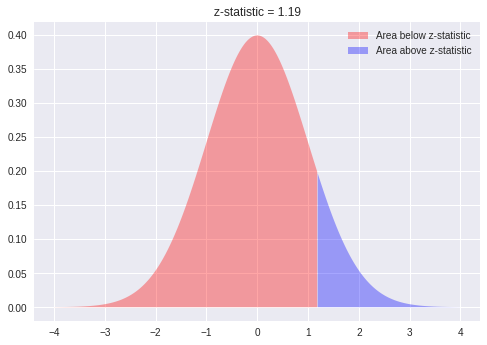

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.19,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.19,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.19,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.19,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 1.19');

#### Step 4: Calculate the p-value

The z-values in a standard normal distribution represent standard deviation.\
In SciPy, the cumulative probability up to the $z$-value can be calculated as:

In [6]:
stats.norm.cdf(z)

0.8821600432854813

The % under the curvefrom a z-score of 1.19 is 88.2%(from above as 0.882 * 100)\
- This means the average intelligenceof the tutored set of students is bigger that 88.2% of the population.
- With an alpha specified at 0.05, we wanted it to be greater than 95% to prove the hypothesis to be significant.

You want to get the p-value by subtracting the z-value from 1 since sum of probabilities is alwats 1.

In [7]:
pval = 1 - stats.norm.cdf(z)
pval

0.11783995671451875

#### Step 5: Interpret p-value

The p-value of 0.12 is larger than the alpha of 0.05.

We were trying to see if tutoring leads to an increase in IQ.

> What we can say is that there is not enough evidence to reject the null hypothesis with the given sample, given an alpha of 0.05.
> We can however say that, given the evidence, the results show a significant increase in the IQ as a result of tutoring

# LABS

## Exercise 1
A fast-food chain claims that the mean time to order food at their restaurants is 60 seconds, with a standard deviation of 30 seconds. You decide to put this claim to the test and go to one of the restaurants to observe actual waiting times. You take a sample of 36 customers and find that the mean order time was 75 seconds. Does this finding provide enough evidence to contradict the fast food chain's claim of fast service?

Follow the 5 steps shown in previous lesson and use $\alpha$ = 0.05. 

#### State your hypotheses 
- Ha : the time to order food is bigger than 60 seconds
- Ho : the time to order food is less than or equal to 60 sec

In [2]:
# Your solution here

import math
import scipy.stats as stats

mu = 60
sigma = 30
n=36
x_bar = 75
z = (x_bar - mu)/(sigma/math.sqrt(n))
p = 1 - stats.norm.cdf(z)

p,z

(0.0013498980316301035, 3.0)

#### Interpret the results in terms of the p-value

- With p-value less than 0.05, you can reject the null hypothesis and say that the time to order food is significantly higher than what the fast food chain claims. 

## Exercise 2

25 students complete a preparation program for taking the SAT test.  Here are the SAT scores from the 25 students who completed the program:

``
434 694 457 534 720 400 484 478 610 641 425 636 454 
514 563 370 499 640 501 625 612 471 598 509 531
``

We know that the population average for SAT scores is 500 with a standard deviation of 100.

Are our 25 students’ SAT scores significantly higher than the population's mean score? 

*Note that the SAT preparation program claims that it will increase (and not decrease) the SAT score.  So, you can conduct a one-directional test. (alpha = .05).*

#### State your hypotheses 


- Ha : there is an increase in grades after program
- Ho : there is no increase in grade 

In [4]:
# Give your solution here 

import numpy as np 
x = np.array([434, 694, 457, 534, 720, 400, 484, 478, 610, 641, 425, 636, 454,
514, 563, 370, 499, 640, 501, 625, 612, 471, 598, 509, 531])
x_bar = x.mean()
n = len(x)
mu = 500
sigma = 100
z = (x_bar - mu)/(sigma/math.sqrt(n))
p = 1 - stats.norm.cdf(z)
p,z

# p = 0.03593031911292577, z = 1.8

(0.03593031911292577, 1.8)

#### Interpret the results in terms of the p-value

- The p value is less than tha alpha so we can conclude that: the training has a SIGNIFICANT effect on the SAT outcome at a significance level of 0.05